In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
m2018 = pd.read_csv('data/matriculas/2018/m2018.csv', sep=';')
m2019 = pd.read_csv('data/matriculas/2019/m2019.csv', sep=';')
r2018 = pd.read_csv('data/rendimiento/2018/r2018.csv', sep=';')

/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_2996/2055398438.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  m2018 = pd.read_csv('data/matriculas/2018/m2018.csv', sep=';')
/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_2996/2055398438.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  m2019 = pd.read_csv('data/matriculas/2019/m2019.csv', sep=';')
/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_2996/2055398438.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  r2018 = pd.read_csv('data/rendimiento/2018/r2018.csv', sep=';')


In [31]:
def analisis_rendimiento(df_anterior, df_posterior, r_anterior):
    # Filtrar los estudiantes que no son prebásica o de educación para adultos
    desertores = df_anterior[(~df_anterior['COD_ENSE2'].isin([1, 3, 4, 6, 8]))]
    print("Estudiantes regulares sin prebasica y adultos año anterior",desertores.shape)


    # Filtrar los estudiantes que no asisten a 4to medio el año a analizar
    desertores = desertores[~((desertores['COD_GRADO'] == 4) & (df_anterior['COD_ENSE2'].isin([5, 7])))]
    print("Estudiantes sin 4to medio año anterior", desertores.shape)

    # Filtrar a los estudiantes df_posterior que no están en 'COD_ENSE2' 1, 3, 4, 6 y 8
    df_posterior = df_posterior[(~df_posterior['COD_ENSE2'].isin([1, 3, 4, 6, 8]))]
    print("Estudiantes sistema regular año posterior",df_posterior.shape)

    # Verificar si los estudiantes están presentes en el archivo actual
    desertores = desertores[~desertores['MRUN'].isin(df_posterior['MRUN'].unique())]
    print("Desertores año a analizar", desertores.shape)
    
    # Estudiantes que se mantienen en el sistema regular
    estudiantes_regulares = df_posterior[df_posterior['MRUN'].isin(df_anterior['MRUN'].unique())]
    print("Estudiantes regulares año a analizar", estudiantes_regulares.shape)

    # Rendimiento estudiantes desertores
    r_desertores = desertores.merge(r_anterior, on='MRUN')
    print("Shape desertores rendimiento", r_desertores.shape)

    # Rendimiento estudiantes regulares
    r_estudiantes_regulares = estudiantes_regulares.merge(r_anterior, on='MRUN')
    print("Shape estudiantes regulares rendimiento",r_estudiantes_regulares.shape)

    # Transformación 'PROM_GRAL' a float
    r_desertores['PROM_GRAL'] = r_desertores['PROM_GRAL'].str.replace(',', '.').astype(float)
    r_estudiantes_regulares['PROM_GRAL'] = r_estudiantes_regulares['PROM_GRAL'].str.replace(',', '.').astype(float)

    # Describe desertores 'PROM_GRAL'
    print("ESTUDIANTES DESERTORES:",r_desertores['PROM_GRAL'].describe())

    # Describe estudiantes regulares 'PROM_GRAL'
    print("ESTUDIANTES REGULARES",r_estudiantes_regulares['PROM_GRAL'].describe())


    # Agregamos una nueva columna 'Tipo' a cada DataFrame
    r_desertores['Tipo'] = 'Desertor'
    r_estudiantes_regulares['Tipo'] = 'Regular'

    # Concatenamos ambos DataFrames
    df_rendimiento = pd.concat([r_desertores, r_estudiantes_regulares])
    display(df_rendimiento.head())

    # Creamos el boxplot con seaborn
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Tipo', y='PROM_GRAL', data=df_rendimiento)
    plt.title('Boxplot del rendimiento de estudiantes regulares y desertores')
    plt.show()

    # Estadísticas de 'PROM_GRAL' agrupadas por 'Tipo'
    estadisticas_prom_gral = df_rendimiento.groupby('Tipo')['PROM_GRAL'].describe()

    print("Estadísticas de PROM_GRAL por tipo de estudiante:\n", estadisticas_prom_gral)

    # Histograma de 'PROM_GRAL' por 'Tipo'
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_rendimiento, x='PROM_GRAL', hue='Tipo', kde=True)
    plt.title('Distribución del rendimiento de estudiantes regulares y desertores')
    plt.show()



    # Porcentaje de asistencia 'ASISTENCIA' estudiantes desertores 
    print("Porcentaje de asistencia estudiantes desertores", r_desertores['ASISTENCIA'].value_counts(normalize=True))
    print(r_desertores['ASISTENCIA'].describe())

    # Porcentaje de asistencia 'ASISTENCIA' estudiantes regulares
    print("Porcentaje de asistencia estudiantes regulares", r_estudiantes_regulares['ASISTENCIA'].value_counts(normalize=True))
    print(r_estudiantes_regulares['ASISTENCIA'].describe())

    # Concatenamos ambos DataFrames
    df_asistencia = pd.concat([r_desertores, r_estudiantes_regulares])
    display(df_asistencia.head())

    # Creamos el boxplot con seaborn
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Tipo', y='ASISTENCIA', data=df_asistencia)
    plt.title('Boxplot de la asistencia de estudiantes regulares y desertores')
    plt.show()

    # Crear una tabla de contingencia para 'Tipo' y 'ASISTENCIA'
    tabla_contingencia = pd.crosstab(df_asistencia['Tipo'], df_asistencia['ASISTENCIA'])

    display("Tabla de contingencia:\n", tabla_contingencia)

    # Crear una tabla de contingencia normalizada para 'Tipo' y 'ASISTENCIA'
    tabla_contingencia_normalizada = pd.crosstab(df_asistencia['Tipo'], df_asistencia['ASISTENCIA'], normalize='index')

    display("Tabla de contingencia normalizada:\n", tabla_contingencia_normalizada)

    

Estudiantes regulares sin prebasica y adultos año anterior (2885532, 34)


/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_2996/3849179728.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  desertores = desertores[~((desertores['COD_GRADO'] == 4) & (df_anterior['COD_ENSE2'].isin([5, 7])))]


Estudiantes sin 4to medio año anterior (2685354, 34)
Estudiantes sistema regular año posterior (2912542, 35)
Desertores año a analizar (79547, 34)
Estudiantes regulares año a analizar (2835039, 35)
Shape desertores rendimiento (87363, 69)
Shape estudiantes regulares rendimiento (2769803, 70)
ESTUDIANTES DESERTORES: count    87363.000000
mean         3.282693
std          2.555925
min          0.000000
25%          0.000000
50%          4.500000
75%          5.400000
max          7.000000
Name: PROM_GRAL, dtype: float64
ESTUDIANTES REGULARES count    2.769803e+06
mean     5.459416e+00
std      1.528338e+00
min      0.000000e+00
25%      5.300000e+00
50%      5.800000e+00
75%      6.300000e+00
max      7.000000e+00
Name: PROM_GRAL, dtype: float64


,AGNO_x,RBD_x,DGV_RBD_x,NOM_RBD_x,COD_REG_RBD_x,COD_PRO_RBD_x,COD_COM_RBD_x,NOM_COM_RBD_x,COD_DEPROV_RBD_x,NOM_DEPROV_RBD_x,...,COD_RAMA_y,COD_SEC_y,COD_ESPE_y,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,Tipo,NOM_REG_RBD_A_x,NOM_REG_RBD_A_y
0,2018,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,...,0,0,0,4.3,76,R,R,Desertor,NaN,NaN
1,2018,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,...,0,0,0,3.9,66,R,R,Desertor,NaN,NaN
2,2018,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,...,0,0,0,0.0,0,Y,Y,Desertor,NaN,NaN
3,2018,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,...,0,0,0,0.0,0,Y,Y,Desertor,NaN,NaN
4,2018,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,...,0,0,0,0.0,0,Y,Y,Desertor,NaN,NaN


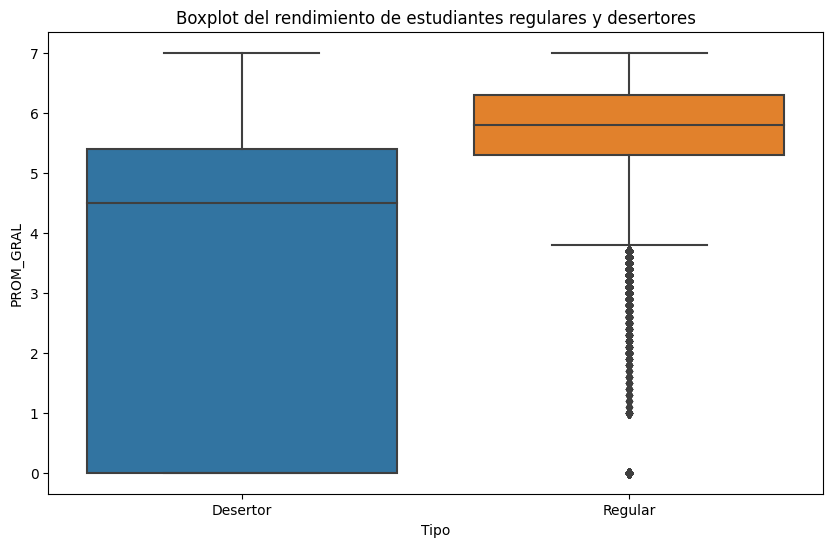

Estadísticas de PROM_GRAL por tipo de estudiante:
               count      mean       std  min  25%  50%  75%  max
Tipo                                                            
Desertor    87363.0  3.282693  2.555925  0.0  0.0  4.5  5.4  7.0
Regular   2769803.0  5.459416  1.528338  0.0  5.3  5.8  6.3  7.0


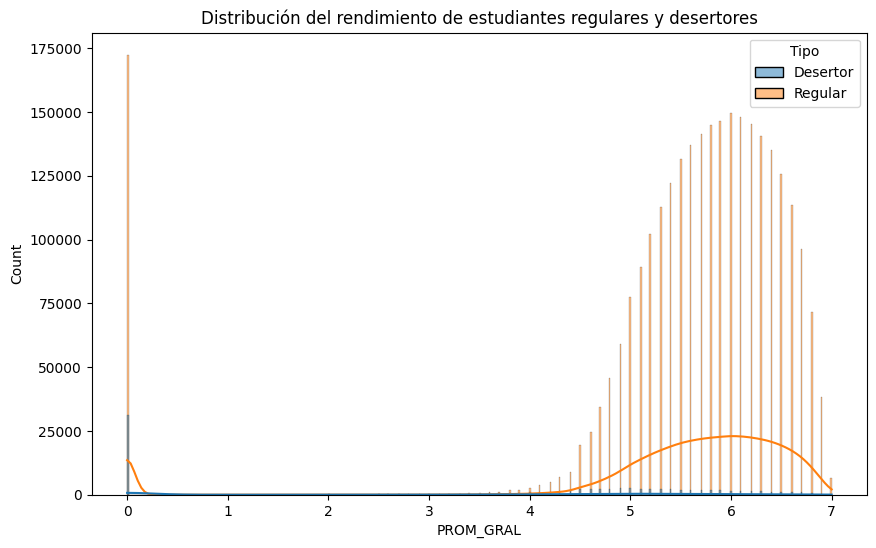

Porcentaje de asistencia estudiantes desertores ASISTENCIA
0     0.355620
85    0.038884
98    0.029005
95    0.027952
97    0.026029
        ...   
11    0.000286
3     0.000275
2     0.000263
7     0.000263
4     0.000217
Name: proportion, Length: 101, dtype: float64
count    87363.000000
mean        52.634262
std         41.778349
min          0.000000
25%          0.000000
50%         74.000000
75%         91.000000
max        100.000000
Name: ASISTENCIA, dtype: float64
Porcentaje de asistencia estudiantes regulares ASISTENCIA
98    0.091512
97    0.082398
99    0.078701
95    0.071168
96    0.066617
        ...   
2     0.000009
5     0.000008
4     0.000008
3     0.000008
6     0.000008
Name: proportion, Length: 101, dtype: float64
count    2.769803e+06
mean     8.661892e+01
std      2.348038e+01
min      0.000000e+00
25%      8.800000e+01
50%      9.400000e+01
75%      9.700000e+01
max      1.000000e+02
Name: ASISTENCIA, dtype: float64


,AGNO_x,RBD_x,DGV_RBD_x,NOM_RBD_x,COD_REG_RBD_x,COD_PRO_RBD_x,COD_COM_RBD_x,NOM_COM_RBD_x,COD_DEPROV_RBD_x,NOM_DEPROV_RBD_x,...,COD_RAMA_y,COD_SEC_y,COD_ESPE_y,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,Tipo,NOM_REG_RBD_A_x,NOM_REG_RBD_A_y
0,2018,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,...,0,0,0,4.3,76,R,R,Desertor,NaN,NaN
1,2018,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,...,0,0,0,3.9,66,R,R,Desertor,NaN,NaN
2,2018,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,...,0,0,0,0.0,0,Y,Y,Desertor,NaN,NaN
3,2018,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,...,0,0,0,0.0,0,Y,Y,Desertor,NaN,NaN
4,2018,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,...,0,0,0,0.0,0,Y,Y,Desertor,NaN,NaN


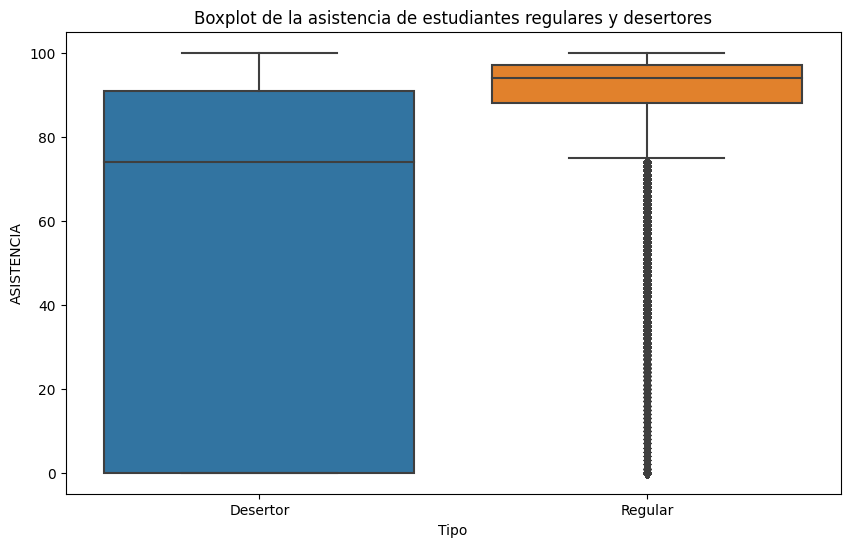

'Tabla de contingencia:\n'

ASISTENCIA,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Tipo,,,,,,,,,,,,,,,,,,,,,
Desertor,31068,66,23,24,19,27,29,23,31,28,...,1956,1948,2110,2202,2442,2108,2274,2534,2011,2261
Regular,172472,81,24,22,22,22,21,39,38,40,...,124218,131764,154626,180104,197120,184516,228227,253471,217985,166485


'Tabla de contingencia normalizada:\n'

ASISTENCIA,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Tipo,,,,,,,,,,,,,,,,,,,,,
Desertor,0.355620,0.000755,0.000263,0.000275,0.000217,0.000309,0.000332,0.000263,0.000355,0.000321,...,0.022389,0.022298,0.024152,0.025205,0.027952,0.024129,0.026029,0.029005,0.023019,0.025881
Regular,0.062269,0.000029,0.000009,0.000008,0.000008,0.000008,0.000008,0.000014,0.000014,0.000014,...,0.044847,0.047572,0.055826,0.065024,0.071168,0.066617,0.082398,0.091512,0.078701,0.060107


In [32]:
analisis_rendimiento(m2018, m2019, r2018)

# 2019 - 2020

In [33]:
m2020 = pd.read_csv('data/matriculas/2020/m2020.csv', sep=';')
r2019 = pd.read_csv('data/rendimiento/2019/r2019.csv', sep=';')

/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_2996/105138606.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  m2020 = pd.read_csv('data/matriculas/2020/m2020.csv', sep=';')
/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_2996/105138606.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  r2019 = pd.read_csv('data/rendimiento/2019/r2019.csv', sep=';')


Estudiantes regulares sin prebasica y adultos año anterior (2912542, 35)


/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_2996/3849179728.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  desertores = desertores[~((desertores['COD_GRADO'] == 4) & (df_anterior['COD_ENSE2'].isin([5, 7])))]


Estudiantes sin 4to medio año anterior (2712467, 35)
Estudiantes sistema regular año posterior (2920286, 35)
Desertores año a analizar (76617, 35)
Estudiantes regulares año a analizar (2863143, 35)
Shape desertores rendimiento (85342, 71)
Shape estudiantes regulares rendimiento (2809892, 71)
ESTUDIANTES DESERTORES: count    85342.000000
mean         3.381978
std          2.669031
min          0.000000
25%          0.000000
50%          4.600000
75%          5.700000
max          7.000000
Name: PROM_GRAL, dtype: float64
ESTUDIANTES REGULARES count    2.809892e+06
mean     5.495916e+00
std      1.560017e+00
min      0.000000e+00
25%      5.300000e+00
50%      5.900000e+00
75%      6.300000e+00
max      7.000000e+00
Name: PROM_GRAL, dtype: float64


,AGNO_x,RBD_x,DGV_RBD_x,NOM_RBD_x,COD_REG_RBD_x,NOM_REG_RBD_A_x,COD_PRO_RBD_x,COD_COM_RBD_x,NOM_COM_RBD_x,COD_DEPROV_RBD_x,...,NOM_COM_ALU_y,COD_RAMA_y,COD_SEC_y,COD_ESPE_y,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN,Tipo
0,2019,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,ARICA,0,0,0,3.4,70,R,R,0,Desertor
1,2019,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,ARICA,0,0,0,0.0,0,Y,T,0,Desertor
2,2019,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,ARICA,0,0,0,5.2,98,P,P,0,Desertor
3,2019,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,ARICA,0,0,0,0.0,0,Y,T,0,Desertor
4,2019,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,ARICA,0,0,0,0.0,0,Y,Y,0,Desertor


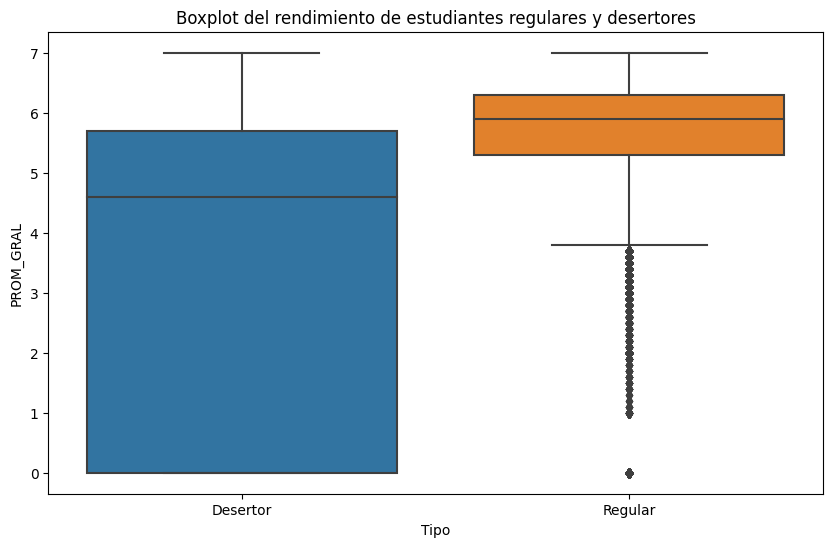

Estadísticas de PROM_GRAL por tipo de estudiante:
               count      mean       std  min  25%  50%  75%  max
Tipo                                                            
Desertor    85342.0  3.381978  2.669031  0.0  0.0  4.6  5.7  7.0
Regular   2809892.0  5.495916  1.560017  0.0  5.3  5.9  6.3  7.0


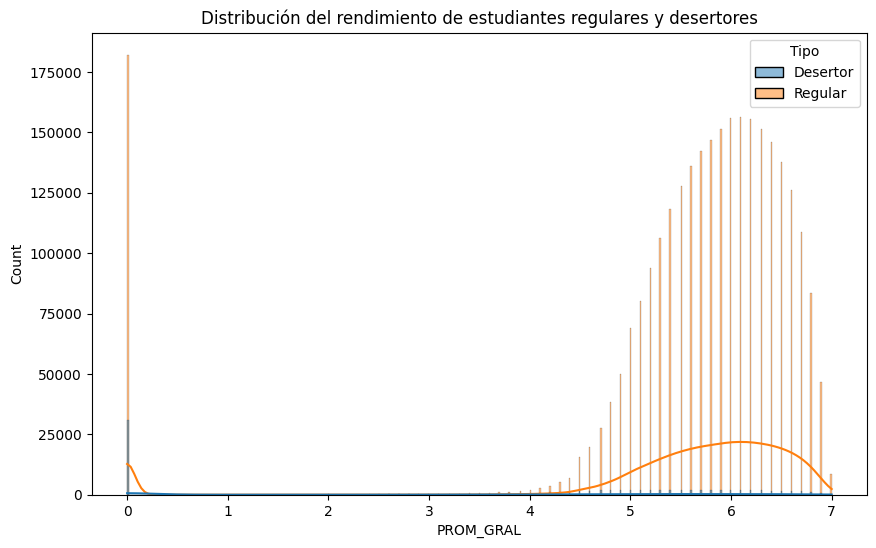

Porcentaje de asistencia estudiantes desertores ASISTENCIA
0      0.361674
85     0.040097
95     0.028169
98     0.026622
100    0.026470
         ...   
6      0.000234
3      0.000223
8      0.000187
2      0.000176
4      0.000152
Name: proportion, Length: 101, dtype: float64
count    85342.000000
mean        52.471655
std         41.971048
min          0.000000
25%          0.000000
50%         74.000000
75%         91.000000
max        100.000000
Name: ASISTENCIA, dtype: float64
Porcentaje de asistencia estudiantes regulares ASISTENCIA
98    0.075979
97    0.069765
99    0.068003
96    0.066934
95    0.066886
        ...   
7     0.000013
4     0.000012
6     0.000010
5     0.000010
3     0.000009
Name: proportion, Length: 101, dtype: float64
count    2.809892e+06
mean     8.546759e+01
std      2.384449e+01
min      0.000000e+00
25%      8.600000e+01
50%      9.300000e+01
75%      9.700000e+01
max      1.000000e+02
Name: ASISTENCIA, dtype: float64


,AGNO_x,RBD_x,DGV_RBD_x,NOM_RBD_x,COD_REG_RBD_x,NOM_REG_RBD_A_x,COD_PRO_RBD_x,COD_COM_RBD_x,NOM_COM_RBD_x,COD_DEPROV_RBD_x,...,NOM_COM_ALU_y,COD_RAMA_y,COD_SEC_y,COD_ESPE_y,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN,Tipo
0,2019,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,ARICA,0,0,0,3.4,70,R,R,0,Desertor
1,2019,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,ARICA,0,0,0,0.0,0,Y,T,0,Desertor
2,2019,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,ARICA,0,0,0,5.2,98,P,P,0,Desertor
3,2019,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,ARICA,0,0,0,0.0,0,Y,T,0,Desertor
4,2019,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,ARICA,0,0,0,0.0,0,Y,Y,0,Desertor


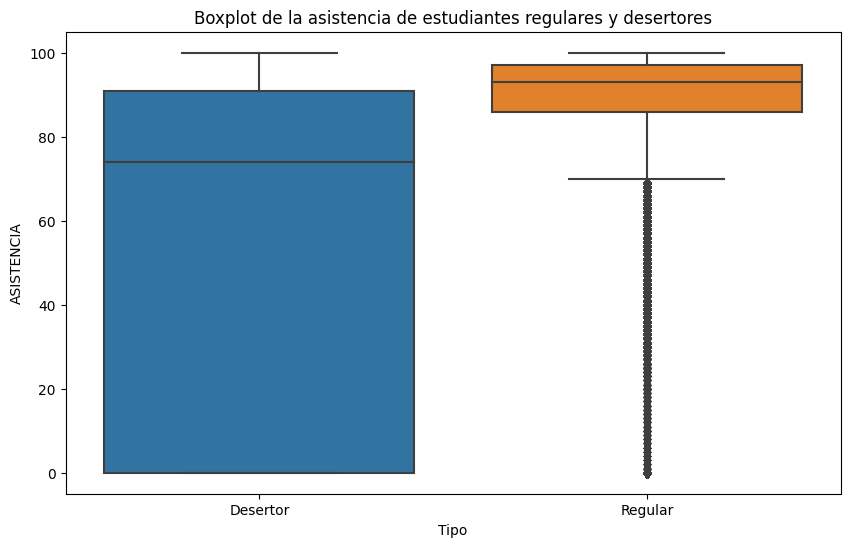

'Tabla de contingencia:\n'

ASISTENCIA,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Tipo,,,,,,,,,,,,,,,,,,,,,
Desertor,30866,83,15,19,13,21,20,34,16,29,...,2011,2069,2016,2199,2404,2147,2252,2272,1916,2259
Regular,182153,88,43,26,35,28,29,37,43,46,...,126331,141056,153289,168623,187943,188077,196031,213492,191080,149867


'Tabla de contingencia normalizada:\n'

ASISTENCIA,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Tipo,,,,,,,,,,,,,,,,,,,,,
Desertor,0.361674,0.000973,0.000176,0.000223,0.000152,0.000246,0.000234,0.000398,0.000187,0.000340,...,0.023564,0.024244,0.023623,0.025767,0.028169,0.025158,0.026388,0.026622,0.022451,0.026470
Regular,0.064826,0.000031,0.000015,0.000009,0.000012,0.000010,0.000010,0.000013,0.000015,0.000016,...,0.044959,0.050200,0.054553,0.060010,0.066886,0.066934,0.069765,0.075979,0.068003,0.053336


In [34]:
analisis_rendimiento(m2019, m2020, r2019)

# 2020 - 2021

In [35]:
m2021 = pd.read_csv('data/matriculas/2021/m2021.csv', sep=';')
r2020 = pd.read_csv('data/rendimiento/2020/r2020.csv', sep=';')

/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_2996/2179286895.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  m2021 = pd.read_csv('data/matriculas/2021/m2021.csv', sep=';')
/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_2996/2179286895.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  r2020 = pd.read_csv('data/rendimiento/2020/r2020.csv', sep=';')


Estudiantes regulares sin prebasica y adultos año anterior (2920286, 35)


/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_2996/3849179728.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  desertores = desertores[~((desertores['COD_GRADO'] == 4) & (df_anterior['COD_ENSE2'].isin([5, 7])))]


Estudiantes sin 4to medio año anterior (2710476, 35)
Estudiantes sistema regular año posterior (2961139, 36)
Desertores año a analizar (51048, 35)
Estudiantes regulares año a analizar (2897401, 36)
Shape desertores rendimiento (46649, 71)
Shape estudiantes regulares rendimiento (2729690, 72)
ESTUDIANTES DESERTORES: count    46649.000000
mean         4.336545
std          2.437726
min          0.000000
25%          2.500000
50%          5.200000
75%          6.300000
max          7.000000
Name: PROM_GRAL, dtype: float64
ESTUDIANTES REGULARES count    2.729690e+06
mean     5.881723e+00
std      1.270899e+00
min      0.000000e+00
25%      5.500000e+00
50%      6.200000e+00
75%      6.700000e+00
max      7.000000e+00
Name: PROM_GRAL, dtype: float64


,AGNO_x,RBD_x,DGV_RBD_x,NOM_RBD_x,COD_REG_RBD_x,NOM_REG_RBD_A_x,COD_PRO_RBD_x,COD_COM_RBD_x,NOM_COM_RBD_x,COD_DEPROV_RBD_x,...,COD_SEC_y,COD_ESPE_y,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN,Tipo,COD_MEN_x,COD_MEN_y
0,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,0,0,4.4,85,P,P,0.0,Desertor,NaN,NaN
1,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,0,0,2.6,85,R,R,0.0,Desertor,NaN,NaN
2,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,0,0,0.0,0,Y,Y,0.0,Desertor,NaN,NaN
3,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,520,52009,4.7,87,P,P,0.0,Desertor,NaN,NaN
4,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,520,52009,2.4,85,R,R,0.0,Desertor,NaN,NaN


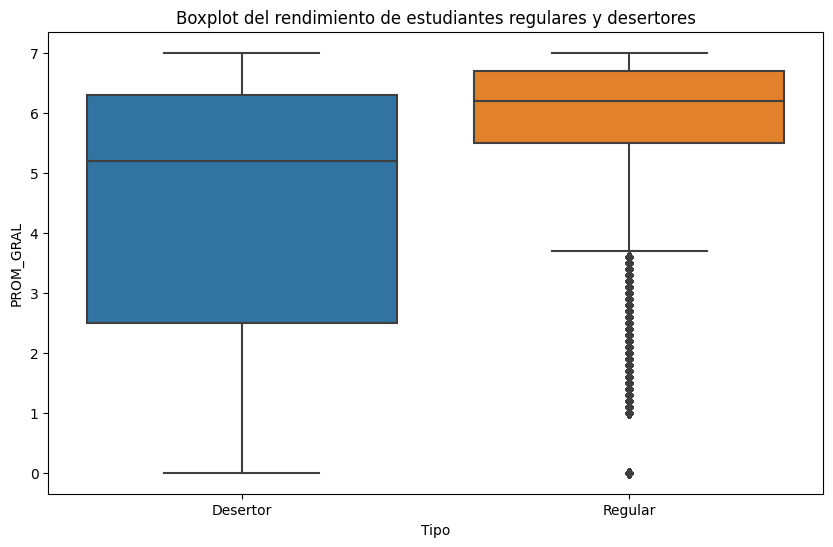

Estadísticas de PROM_GRAL por tipo de estudiante:
               count      mean       std  min  25%  50%  75%  max
Tipo                                                            
Desertor    46649.0  4.336545  2.437726  0.0  2.5  5.2  6.3  7.0
Regular   2729690.0  5.881723  1.270899  0.0  5.5  6.2  6.7  7.0


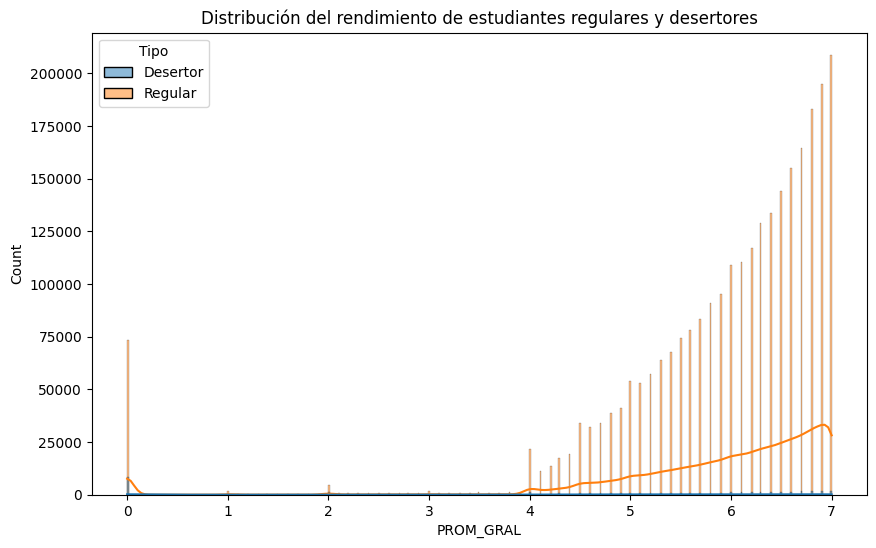

Porcentaje de asistencia estudiantes desertores ASISTENCIA
100    0.287938
85     0.231731
0      0.181526
90     0.059980
95     0.034063
         ...   
19     0.000129
24     0.000107
39     0.000107
48     0.000107
49     0.000043
Name: proportion, Length: 101, dtype: float64
count    46649.000000
mean        71.121224
std         38.469892
min          0.000000
25%         61.000000
50%         85.000000
75%        100.000000
max        100.000000
Name: ASISTENCIA, dtype: float64
Porcentaje de asistencia estudiantes regulares ASISTENCIA
100    0.445076
85     0.221972
90     0.072779
95     0.057411
0      0.026819
         ...   
14     0.000066
18     0.000060
22     0.000059
7      0.000055
19     0.000052
Name: proportion, Length: 101, dtype: float64
count    2.729690e+06
mean     9.079894e+01
std      1.808863e+01
min      0.000000e+00
25%      8.500000e+01
50%      9.700000e+01
75%      1.000000e+02
max      1.000000e+02
Name: ASISTENCIA, dtype: float64


,AGNO_x,RBD_x,DGV_RBD_x,NOM_RBD_x,COD_REG_RBD_x,NOM_REG_RBD_A_x,COD_PRO_RBD_x,COD_COM_RBD_x,NOM_COM_RBD_x,COD_DEPROV_RBD_x,...,COD_SEC_y,COD_ESPE_y,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN,Tipo,COD_MEN_x,COD_MEN_y
0,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,0,0,4.4,85,P,P,0.0,Desertor,NaN,NaN
1,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,0,0,2.6,85,R,R,0.0,Desertor,NaN,NaN
2,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,0,0,0.0,0,Y,Y,0.0,Desertor,NaN,NaN
3,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,520,52009,4.7,87,P,P,0.0,Desertor,NaN,NaN
4,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,520,52009,2.4,85,R,R,0.0,Desertor,NaN,NaN


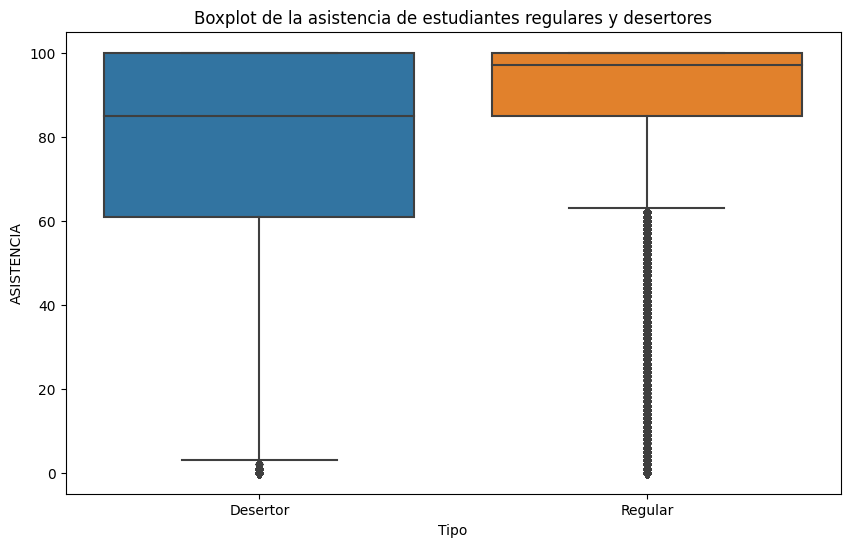

'Tabla de contingencia:\n'

ASISTENCIA,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Tipo,,,,,,,,,,,,,,,,,,,,,
Desertor,8468,552,48,30,26,73,19,12,17,9,...,199,312,290,316,1589,451,473,808,877,13432
Regular,73207,2411,342,636,1720,585,197,151,206,199,...,17965,25186,25082,26833,156715,33952,37155,63748,72518,1214919


'Tabla de contingencia normalizada:\n'

ASISTENCIA,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Tipo,,,,,,,,,,,,,,,,,,,,,
Desertor,0.181526,0.011833,0.001029,0.000643,0.000557,0.001565,0.000407,0.000257,0.000364,0.000193,...,0.004266,0.006688,0.006217,0.006774,0.034063,0.009668,0.010140,0.017321,0.018800,0.287938
Regular,0.026819,0.000883,0.000125,0.000233,0.000630,0.000214,0.000072,0.000055,0.000075,0.000073,...,0.006581,0.009227,0.009189,0.009830,0.057411,0.012438,0.013611,0.023354,0.026566,0.445076


In [36]:
analisis_rendimiento(m2020, m2021, r2020)

# 2021 - 2022

In [37]:
m2022 = pd.read_csv('data/matriculas/2022/m2022.csv', sep=';')
r2021 = pd.read_csv('data/rendimiento/2021/r2021.csv', sep=';')

/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_2996/3984599614.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  m2022 = pd.read_csv('data/matriculas/2022/m2022.csv', sep=';')
/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_2996/3984599614.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  r2021 = pd.read_csv('data/rendimiento/2021/r2021.csv', sep=';')


Estudiantes regulares sin prebasica y adultos año anterior (2961139, 36)


/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_2996/3849179728.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  desertores = desertores[~((desertores['COD_GRADO'] == 4) & (df_anterior['COD_ENSE2'].isin([5, 7])))]


Estudiantes sin 4to medio año anterior (2746793, 36)
Estudiantes sistema regular año posterior (2998828, 36)
Desertores año a analizar (69367, 36)
Estudiantes regulares año a analizar (2911687, 36)
Shape desertores rendimiento (70087, 72)
Shape estudiantes regulares rendimiento (2757522, 72)
ESTUDIANTES DESERTORES: count    70087.000000
mean         4.109611
std          2.431522
min          0.000000
25%          2.300000
50%          5.000000
75%          6.100000
max          7.000000
Name: PROM_GRAL, dtype: float64
ESTUDIANTES REGULARES count    2.757522e+06
mean     5.854215e+00
std      1.260817e+00
min      0.000000e+00
25%      5.500000e+00
50%      6.200000e+00
75%      6.600000e+00
max      7.000000e+00
Name: PROM_GRAL, dtype: float64


,AGNO_x,RBD_x,DGV_RBD_x,NOM_RBD_x,COD_REG_RBD_x,NOM_REG_RBD_A_x,COD_PRO_RBD_x,COD_COM_RBD_x,NOM_COM_RBD_x,COD_DEPROV_RBD_x,...,NOM_COM_ALU_y,COD_RAMA_y,COD_SEC_y,COD_ESPE_y,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN_y,Tipo
0,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,ARICA,0,0,0,6.4,90,P,P,0,Desertor
1,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,MELIPILLA,0,0,0,5.3,90,P,P,0,Desertor
2,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,QUILLOTA,0,0,0,0.0,0,Y,Y,0,Desertor
3,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,ARICA,0,0,0,4.9,88,P,P,0,Desertor
4,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,ARICA,0,0,0,4.6,85,P,P,0,Desertor


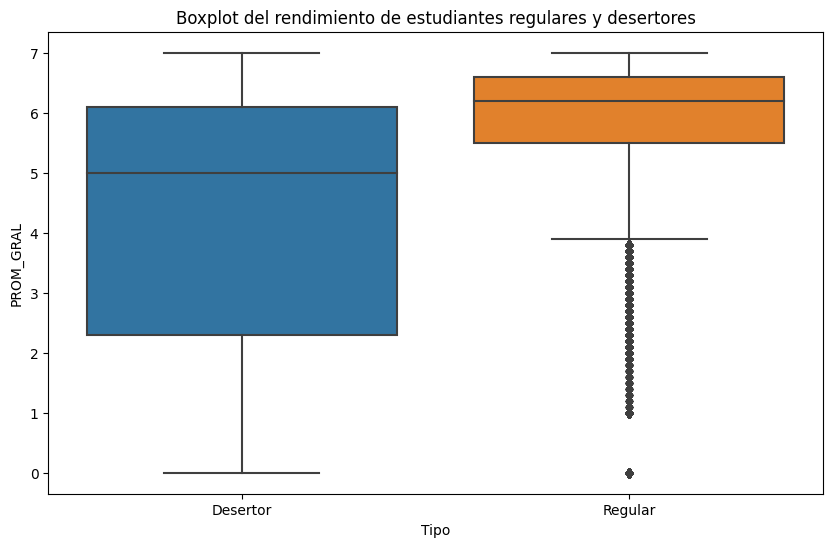

Estadísticas de PROM_GRAL por tipo de estudiante:
               count      mean       std  min  25%  50%  75%  max
Tipo                                                            
Desertor    70087.0  4.109611  2.431522  0.0  2.3  5.0  6.1  7.0
Regular   2757522.0  5.854215  1.260817  0.0  5.5  6.2  6.6  7.0


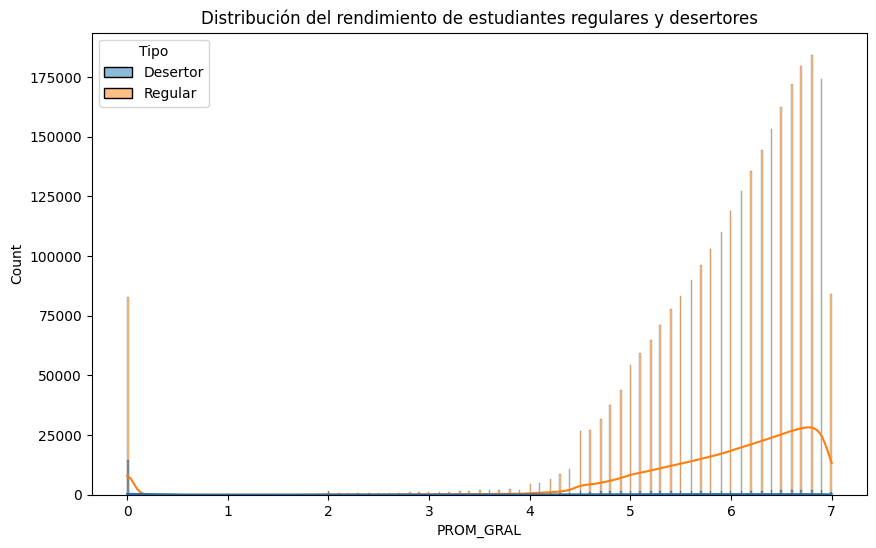

Porcentaje de asistencia estudiantes desertores ASISTENCIA
85     0.232554
0      0.209582
100    0.154237
90     0.052948
95     0.028507
         ...   
21     0.000842
32     0.000842
22     0.000813
26     0.000785
19     0.000770
Name: proportion, Length: 101, dtype: float64
count    70087.000000
mean        63.760954
std         39.431573
min          0.000000
25%         16.000000
50%         85.000000
75%         94.000000
max        100.000000
Name: ASISTENCIA, dtype: float64
Porcentaje de asistencia estudiantes regulares ASISTENCIA
100    0.237040
85     0.233958
90     0.072592
95     0.056598
98     0.045179
         ...   
22     0.000508
21     0.000506
16     0.000505
17     0.000503
19     0.000498
Name: proportion, Length: 101, dtype: float64
count    2.757522e+06
mean     8.633620e+01
std      2.166093e+01
min      0.000000e+00
25%      8.500000e+01
50%      9.100000e+01
75%      9.900000e+01
max      1.000000e+02
Name: ASISTENCIA, dtype: float64


,AGNO_x,RBD_x,DGV_RBD_x,NOM_RBD_x,COD_REG_RBD_x,NOM_REG_RBD_A_x,COD_PRO_RBD_x,COD_COM_RBD_x,NOM_COM_RBD_x,COD_DEPROV_RBD_x,...,NOM_COM_ALU_y,COD_RAMA_y,COD_SEC_y,COD_ESPE_y,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN_y,Tipo
0,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,ARICA,0,0,0,6.4,90,P,P,0,Desertor
1,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,MELIPILLA,0,0,0,5.3,90,P,P,0,Desertor
2,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,QUILLOTA,0,0,0,0.0,0,Y,Y,0,Desertor
3,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,ARICA,0,0,0,4.9,88,P,P,0,Desertor
4,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,ARICA,0,0,0,4.6,85,P,P,0,Desertor


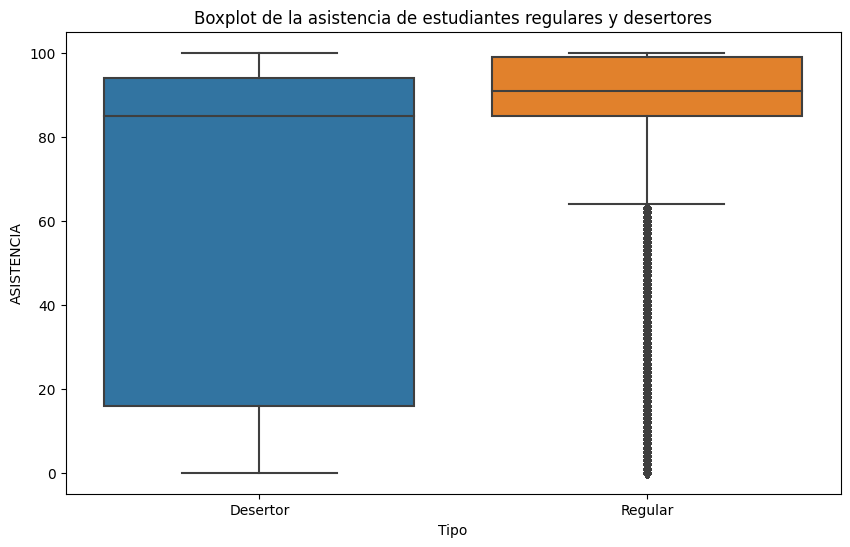

'Tabla de contingencia:\n'

ASISTENCIA,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Tipo,,,,,,,,,,,,,,,,,,,,,
Desertor,14689,887,213,118,104,180,84,84,81,76,...,581,743,840,763,1998,855,955,1336,1084,10810
Regular,82849,11521,3238,2175,1517,2104,1534,1455,1762,1755,...,41616,50260,54862,57248,156069,74168,84305,124581,107995,653642


'Tabla de contingencia normalizada:\n'

ASISTENCIA,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Tipo,,,,,,,,,,,,,,,,,,,,,
Desertor,0.209582,0.012656,0.003039,0.001684,0.001484,0.002568,0.001199,0.001199,0.001156,0.001084,...,0.008290,0.010601,0.011985,0.010886,0.028507,0.012199,0.013626,0.019062,0.015466,0.154237
Regular,0.030045,0.004178,0.001174,0.000789,0.000550,0.000763,0.000556,0.000528,0.000639,0.000636,...,0.015092,0.018227,0.019895,0.020761,0.056598,0.026897,0.030573,0.045179,0.039164,0.237040


In [38]:
analisis_rendimiento(m2021, m2022, r2021)